In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("CC GENERAL.csv")


data = data.drop("CUST_ID", axis = 1)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mode()[0],inplace = True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0],inplace = True)

In [26]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(data)
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,6
1,12
2,21
3,21
4,6
...,...
8945,6
8946,6
8947,6
8948,6


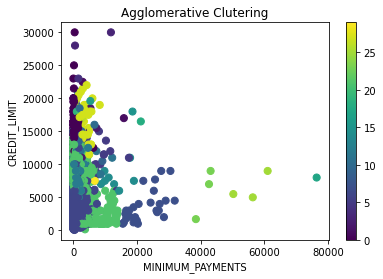

In [27]:
fig = plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter (data ["MINIMUM_PAYMENTS"] , data ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)

ax.set_title("Agglomerative Clutering")

ax.set_xlabel("MINIMUM_PAYMENTS")

ax.set_ylabel("CREDIT_LIMIT")

plt.colorbar(scatter)

DENDROGRAM

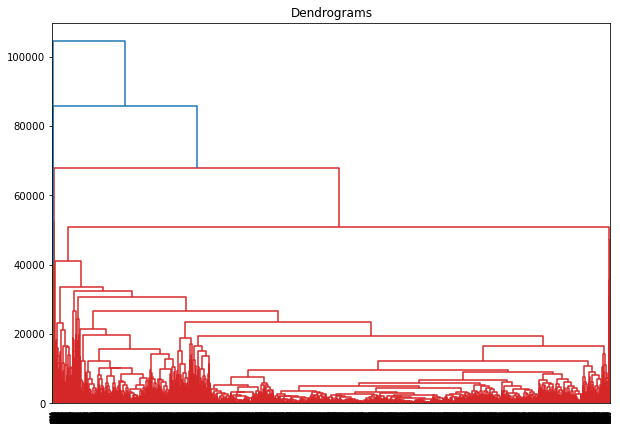

In [28]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

BEST K VALUE

In [32]:
inertias = []
mapping2 = {}

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
 
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

In [33]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 393159970616.2698
2 : 279342474652.3524
3 : 232842052914.78235
4 : 206846876496.66745
5 : 181724399921.53696
6 : 161537708679.8218
7 : 145210634407.7492
8 : 132874241824.85585
9 : 124169136843.25687


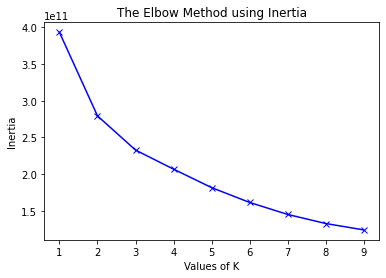

In [34]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [40]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters

kmeans.fit(data)

labels=pd.DataFrame(kmeans.labels_)

labels.max()

0    2
dtype: int32

Clusters Plot

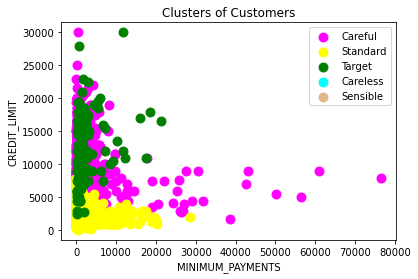

In [41]:
data["labels"] = labels

plt.scatter(data["MINIMUM_PAYMENTS"][data.labels == 0],          
            data["CREDIT_LIMIT"][data.labels == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["MINIMUM_PAYMENTS"][data.labels == 1],
           data["CREDIT_LIMIT"][data.labels == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["MINIMUM_PAYMENTS"][data.labels == 2],
           data["CREDIT_LIMIT"][data.labels == 2],s=80,c='green',label='Target')
plt.scatter(data["MINIMUM_PAYMENTS"][data.labels == 3], 
           data["CREDIT_LIMIT"][data.labels == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["MINIMUM_PAYMENTS"][data.labels == 4], 
           data["CREDIT_LIMIT"][data.labels == 4],s=80,c='burlywood',label='Sensible')

plt.title('Clusters of Customers')

plt.xlabel('MINIMUM_PAYMENTS')

plt.ylabel('CREDIT_LIMIT')

plt.legend()

plt.show()

The second result is better clear than the first one

Bonus : DBSCAN as another metric

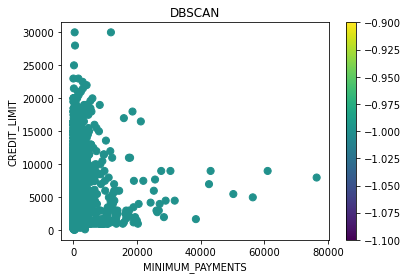

In [31]:
#import DBSCAN & instantiate it with parameters

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples = 2)
clusters = dbscan.fit_predict(data)

fig = plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter (data ["MINIMUM_PAYMENTS"] , data ["CREDIT_LIMIT"] , c= clusters, s=50)

ax.set_title("DBSCAN")

ax.set_xlabel("MINIMUM_PAYMENTS")

ax.set_ylabel("CREDIT_LIMIT")

plt.colorbar(scatter)